<a href="https://colab.research.google.com/github/karimbdir/CryptoCurrencies-Financial-Analysis/blob/main/Cryptocurrencies_Financial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
btc = wb.DataReader('BTC-USD', data_source='yahoo',start='2010-1-1')

In [ ]:
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


In [ ]:
btc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-15,19525.007812,19079.841797,19246.919922,19417.076172,26741982541,19417.076172
2020-12-16,21458.908203,19298.316406,19418.818359,21310.597656,44409011479,21310.597656
2020-12-17,23642.660156,21234.675781,21308.351562,22805.162109,71378606374,22805.162109
2020-12-18,23238.601562,22399.812500,22806.796875,23137.960938,40387896275,23137.960938
2020-12-19,24075.230469,22848.425781,23816.000000,23910.951172,38392799232,23910.951172


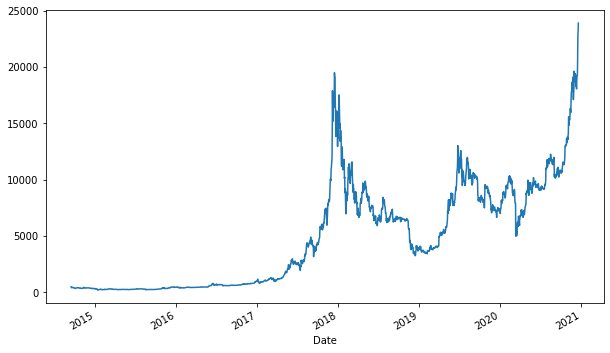

In [ ]:
btc['Close'].plot(figsize=(10,6))

Simple Rate of Return

(P1-P0)/P0 = (P1-P0) - 1

In [ ]:
btc['Simple Return'] = (btc['Adj Close'] / btc['Adj Close'].shift(1)) - 1

In [ ]:
print(btc['Simple Return'])

Date
2014-09-16         NaN
2014-09-17   -0.071926
2014-09-18   -0.069843
2014-09-19    0.035735
2014-09-20   -0.024659
                ...   
2020-12-15    0.008855
2020-12-16    0.097518
2020-12-17    0.070132
2020-12-18    0.014593
2020-12-19    0.033408
Name: Simple Return, Length: 2286, dtype: float64


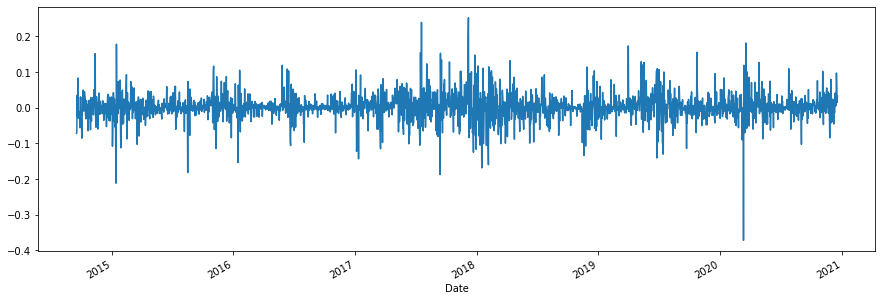

In [ ]:
btc['Simple Return'].plot(figsize=(15,5))

In [ ]:
average_return = btc['Simple Return'].mean() * 250
average_return

0.6203389533417716

In [ ]:
print(str(average_return *100) + '%')

62.03389533417716%


Log Returns

ln(Pt / P t-1)

In [ ]:
btc['Log Return'] = np.log(btc['Adj Close'] / btc['Adj Close'].shift(1))

In [ ]:
print(btc['Log Return'])

Date
2014-09-16         NaN
2014-09-17   -0.074643
2014-09-18   -0.072402
2014-09-19    0.035111
2014-09-20   -0.024968
                ...   
2020-12-15    0.008816
2020-12-16    0.093052
2020-12-17    0.067782
2020-12-18    0.014488
2020-12-19    0.032862
Name: Log Return, Length: 2286, dtype: float64


In [ ]:
average_log_return = btc['Log Return'].mean() * 250
print(str(average_log_return *100) + '%')

43.28969180630299%


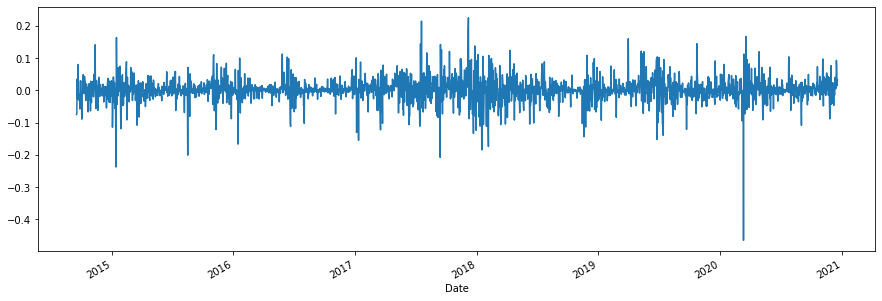

In [ ]:
btc['Log Return'].plot(figsize=(15,5))

In [ ]:
import fbprophet as Prophet

In [ ]:
df = btc

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Simple Return,Log Return
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800,457.334015,NaN,NaN
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200,424.440002,-0.071926,-0.074643
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700,394.795990,-0.069843,-0.072402
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600,408.903992,0.035735,0.035111
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100,398.821014,-0.024659,-0.024968


In [ ]:
columns = ['Date','Close']
prophet_df = df.rename(columns = {'Date':'ds','Close':'y'})

In [ ]:
prophet_df.head()

,ds,High,Low,Open,y,Volume,Adj Close,Simple Return,Log Return
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800,457.334015,NaN,NaN
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200,424.440002,-0.071926,-0.074643
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700,394.795990,-0.069843,-0.072402
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600,408.903992,0.035735,0.035111
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100,398.821014,-0.024659,-0.024968


In [ ]:
prophet_df = pd.DataFrame(prophet_df, columns = ['ds','y'])

In [ ]:
prophet_df.head()

,ds,y
0,2014-09-16,457.334015
1,2014-09-17,424.440002
2,2014-09-18,394.795990
3,2014-09-19,408.903992
4,2014-09-20,398.821014


In [ ]:
model = Prophet.Prophet()

In [ ]:
model.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)


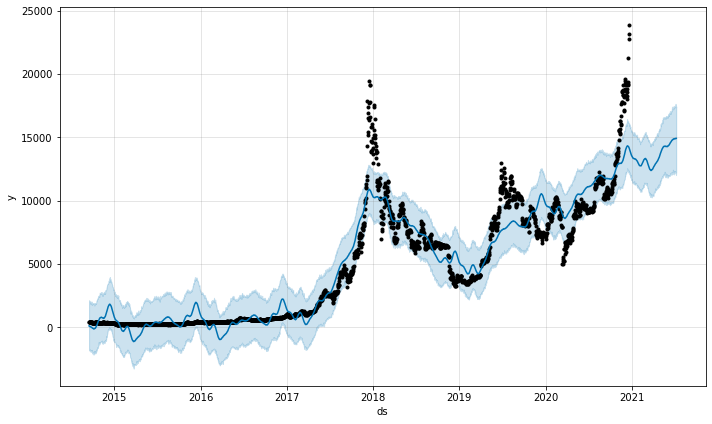

In [ ]:
figure = model.plot(forecast, xlabel='ds',ylabel='y')


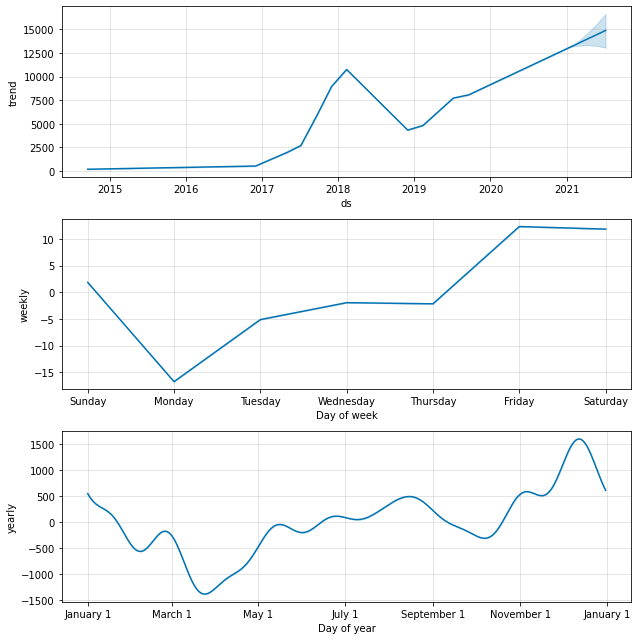

In [ ]:
figure2 = model.plot_components(forecast)

In [ ]:
forecast.to_csv('Forecast.csv')
from google.colab import files
files.download('Forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Calculating the Return of a Porfolio of Cryptocurrencies

In [ ]:
stocks = ['BTC-USD','ETH-USD','BCH-USD']
crypto = pd.DataFrame()
for s in stocks:
  crypto[s] = wb.DataReader(s,data_source='yahoo',start='2017-10-01')['Close']


In [ ]:
crypto.head()

,BTC-USD,ETH-USD,BCH-USD
Date,,,
2017-09-30,4403.740234,302.337006,415.152008
2017-10-01,4409.319824,297.475006,421.186005
2017-10-02,4317.479980,292.463013,404.177002
2017-10-03,4229.359863,292.657990,358.446991
2017-10-04,4328.410156,295.863007,355.750000


In [ ]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1176 entries, 2017-09-30 to 2020-12-19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC-USD  1176 non-null   float64
 1   ETH-USD  1176 non-null   float64
 2   BCH-USD  1176 non-null   float64
dtypes: float64(3)
memory usage: 36.8 KB


In [ ]:
crypto.tail()

,BTC-USD,ETH-USD,BCH-USD
Date,,,
2020-12-15,19417.076172,589.355591,288.394379
2020-12-16,21310.597656,636.181824,311.419037
2020-12-17,22805.162109,642.868958,310.301575
2020-12-18,23137.960938,654.811951,312.779449
2020-12-19,23807.527344,658.808289,316.736511


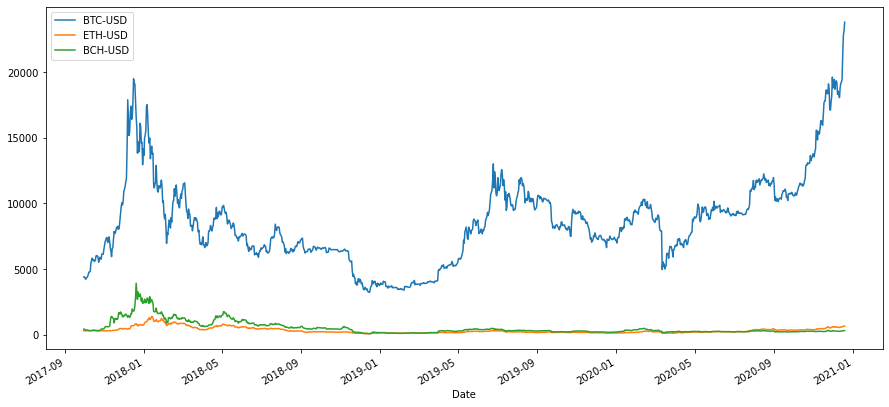

In [ ]:
crypto.plot(figsize=(15,7))

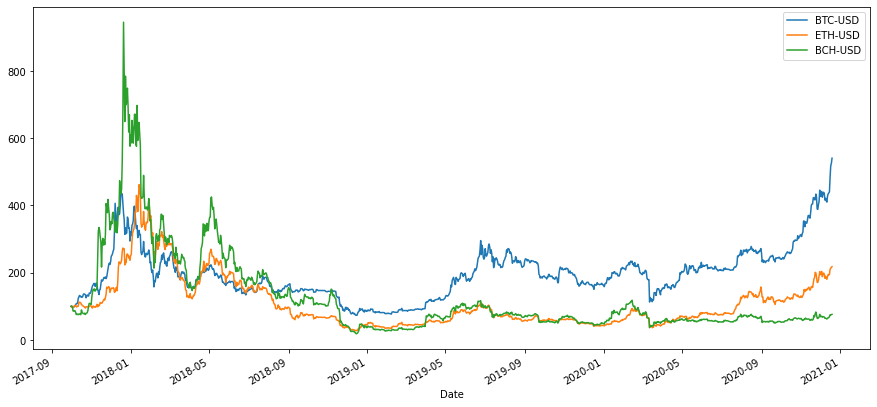

In [ ]:
(crypto / crypto.iloc[0] * 100).plot(figsize=(15,7))

Return of Portfolio

In [ ]:
returns = (crypto / crypto.shift(1)) - 1 
returns.head(20)

,BTC-USD,ETH-USD,BCH-USD
Date,,,
2017-09-30,NaN,NaN,NaN
2017-10-01,0.001267,-0.016081,0.014534
2017-10-02,-0.020829,-0.016848,-0.040384
2017-10-03,-0.020410,0.000667,-0.113144
2017-10-04,0.023420,0.010951,-0.007524
2017-10-05,0.009796,0.043010,0.020419
2017-10-06,0.012831,0.008218,-0.006149
2017-10-07,0.041472,-0.008087,-0.051472
2017-10-08,0.035038,-0.036344,-0.081970


In [ ]:
annual_returns = returns.mean() * 250
annual_returns

BTC-USD    0.572638
ETH-USD    0.484661
BCH-USD    0.521946
dtype: float64

In [ ]:
#let's assume the porfolio have the same weights
weights = np.array([0.33,0.33,0.33])
np.dot(annual_returns, weights)

0.5211508679098951

In [ ]:
portfolio = str(np.dot(annual_returns,weights) * 100) + '%'
print(portfolio)

52.11508679098951%


# **Security Risk**

In [ ]:
stocks = ['DASH-USD', 'LTC-USD']
sec_cryto = pd.DataFrame()
for s in stocks:
  sec_cryto[s] = wb.DataReader(s, data_source='yahoo', start='2015-10-01')['Close']

In [ ]:
sec_cryto.head()

,DASH-USD,LTC-USD
Date,,
2015-09-30,2.29430,3.00192
2015-10-01,2.21804,2.99320
2015-10-02,2.17149,3.03008
2015-10-03,2.17243,3.01436
2015-10-04,2.33847,3.01599


In [ ]:
sec_cryto.tail()

,DASH-USD,LTC-USD
Date,,
2020-12-15,96.927231,81.400673
2020-12-16,104.788521,92.789688
2020-12-17,108.360016,100.959572
2020-12-18,108.036873,109.384506
2020-12-19,108.443497,120.508316


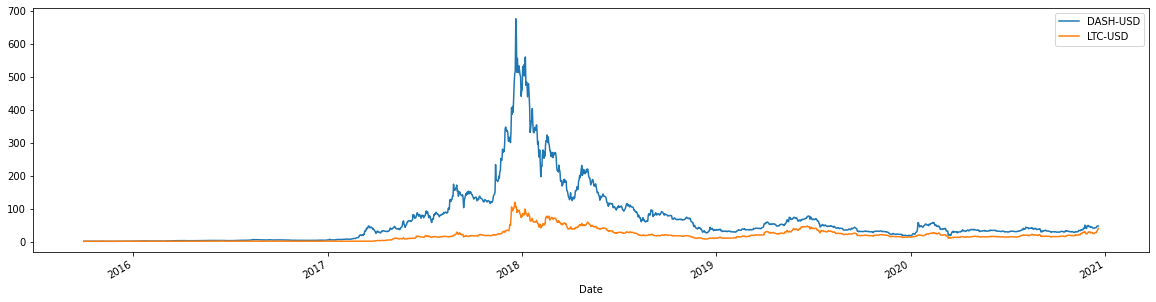

In [ ]:
(sec_cryto/ sec_cryto.iloc[0]).plot(figsize=(20,5))

Returns

In [ ]:
sec_returns = np.log(sec_cryto/ sec_cryto.shift(1))
sec_returns

,DASH-USD,LTC-USD
Date,,
2015-09-30,NaN,NaN
2015-10-01,-0.033804,-0.002909
2015-10-02,-0.021210,0.012246
2015-10-03,0.000433,-0.005202
2015-10-04,0.073650,0.000541
...,...,...
2020-12-15,0.002877,-0.011755
2020-12-16,0.077984,0.130952
2020-12-17,0.033515,0.084385


In [ ]:
sec_returns[['DASH-USD','LTC-USD']].mean() * 250

DASH-USD    0.505745
LTC-USD     0.484321
dtype: float64

In [ ]:
#Volatility
sec_returns[['DASH-USD','LTC-USD']].std() * 250 ** 0.5

DASH-USD    0.912033
LTC-USD     0.871678
dtype: float64

Correlation and Covariance

In [ ]:
DASH_var = sec_returns['DASH-USD'].var() * 250

In [ ]:
DASH_var

0.8318032896338386

In [ ]:
LTC_var = sec_returns['LTC-USD'].var() * 250

In [ ]:
LTC_var

0.7598223139269875

In [ ]:
cov_matrix = sec_returns.cov() * 250
cov_matrix

,DASH-USD,LTC-USD
DASH-USD,0.831803,0.414724
LTC-USD,0.414724,0.759822


In [ ]:
corr_matrix = sec_returns.corr()
corr_matrix

,DASH-USD,LTC-USD
DASH-USD,1.000000,0.521667
LTC-USD,0.521667,1.000000


Porfolio Risk

In [ ]:
#We assume the same weights
weights = np.array([0.5,0.5])

In [ ]:
#Portfolio Volatility
portfolio_vol = (np.dot(weights.T,np.dot(sec_returns.cov()*250, weights))) ** 0.5
portfolio_vol

0.7779900118060339

In [ ]:
#Portfolio Varience
portfolio_var = (np.dot(weights.T,np.dot(sec_returns.cov() * 250, weights)))
portfolio_var

0.6052684584699527

# **Diversification**

Diversiafiable Risk

In [ ]:
div_risk = portfolio_var - (weights[0] ** 2 * DASH_var) - (weights[1] ** 2 * LTC_var)
div_risk

0.20736205757974618

In [ ]:
non_div_risk = (weights[0] ** 2 * DASH_var) - (weights[1] ** 2 * LTC_var)
non_div_risk

0.017995243926712784

## **Monte Carlo - Forecasting Stock Prices**

In [49]:
stock = 'BTC-USD'
btc = pd.DataFrame()
btc[stock] = wb.DataReader(stock, data_source='yahoo',start='2015-1-1')['Close']

In [ ]:
btc.head()

,BTC-USD
Date,
2015-01-01,314.248993
2015-01-02,315.032013
2015-01-03,281.082001
2015-01-04,264.195007
2015-01-05,274.473999


In [ ]:
log_returns = np.log(1 + btc.pct_change())

In [ ]:
log_returns.head(10)

,BTC-USD
Date,
2015-01-01,NaN
2015-01-02,0.002489
2015-01-03,-0.114028
2015-01-04,-0.061959
2015-01-05,0.038169
2015-01-06,0.041796
2015-01-07,0.028073
2015-01-08,-0.038046
2015-01-09,0.024607


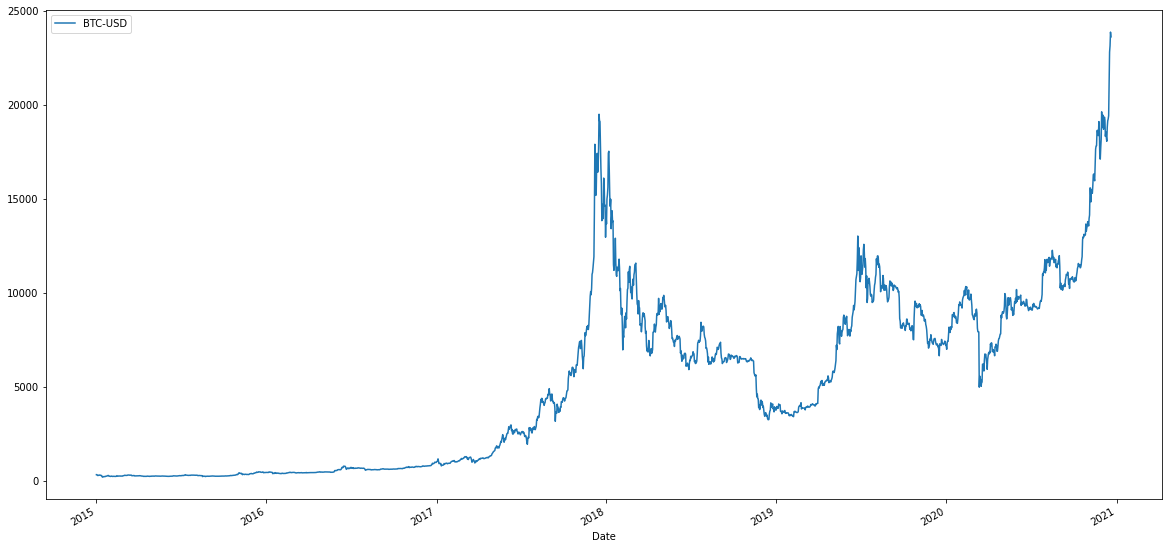

In [ ]:
btc.plot(figsize=(20,10))

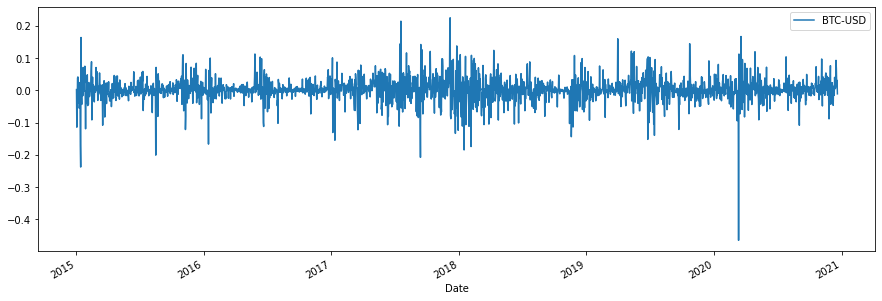

In [ ]:
log_returns.plot(figsize=(15,5))

To calculate the Driftwe need the mean of log return and variance


Drift = mean of log returns - (1/2) * variance of log returns

In [ ]:
log_returns_mean = log_returns.mean()
log_returns_var = log_returns.var()

drift = log_returns_mean - (0.5 * log_returns_var)
drift

BTC-USD    0.001216
dtype: float64

In [ ]:
standard_deviation = log_returns.std()
standard_deviation

BTC-USD    0.03912
dtype: float64

In [ ]:
#Z 
#Z = norm.ppf(np.random.rand(t_intervals,iterations))

In [ ]:
t_intervals = 1500
iterations = 20

In [50]:
daily_returns = np.exp(drift.values+ standard_deviation.values * norm.ppf(np.random.rand(t_intervals,iterations)))

In [51]:
daily_returns

array([[0.98467142, 1.14087965, 1.06273154, ..., 1.01910269, 0.97054961,
        0.94382568],
       [0.93555285, 1.08690634, 1.07312981, ..., 1.10805605, 1.05151954,
        1.00990388],
       [1.00453153, 0.98370185, 0.98970473, ..., 0.98995954, 1.01026247,
        0.95652486],
       ...,
       [1.02239069, 0.97445732, 1.0179078 , ..., 1.02182237, 1.07703569,
        1.03296042],
       [1.01498541, 0.97330059, 1.10012985, ..., 0.94615397, 0.97473282,
        0.96905051],
       [0.91545009, 1.01893934, 0.9365347 , ..., 0.94143633, 0.95438848,
        1.06024586]])

S1 = S0 * daily_returns

In [55]:
S0 = btc.iloc[-1]
S0

BTC-USD    23469.699219
Name: 2020-12-20 00:00:00, dtype: float64

In [53]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
price_list[0] = S0


In [56]:
for t in range(1,t_intervals):
  price_list[t] = price_list[t - 1 ] * daily_returns[t]
  

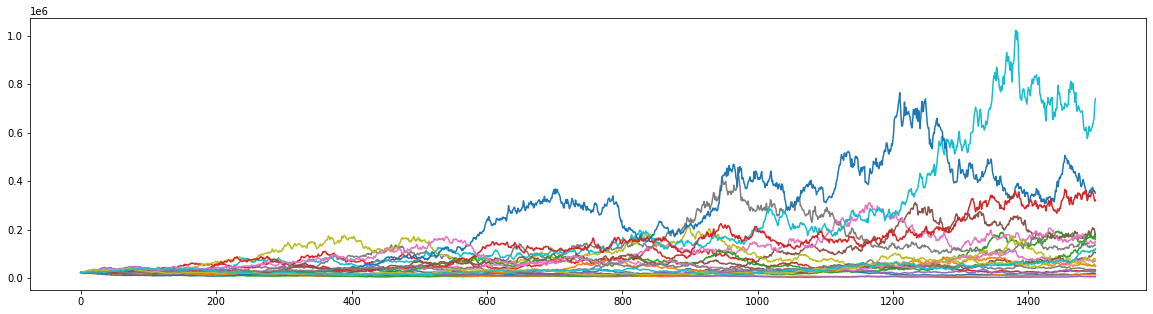

In [60]:
plt.figure(figsize=(20,5))
plt.plot(price_list);
